# Proyecto 
***Física Computacional***


**Azaneth González Domínguez**

_30/11/22_

La transformada discreta de Fourier permite realizar el análisis espectral de una señal. Nos lleva del espacio de tiempo discreto al espacio de frecuencias, donde podemos obtener información sobre las componentes frecuenciales predominantes de una señal.La representación tiempo­ 
frecuencia de la señal provee información de la distribución de su  energía en los dos dominios, lográndose una
descripción más completa del fenómeno físico]. Sin 
embargo, una transformación de la señal implica un  costo 
computacional adicional y un espacio de características de
mayor dimensión. Las técnicas más utilizadas en la
extracción de características espectrales han sido: la
transformada de Fourier STFT (Short Time Fourier
Transform), la transformada wavelet continua CWT, la
transformada wavelet discreta DWT y la transformada de
paquetes wavelet WPT, como veremos a continuación.

In [18]:
import pandas as pd
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import scipy.fftpack as fourier
import scipy.io.wavfile as waves
import winsound

Primero, nuestra señal obtenida en el osciloscopio debe ser analizada, limpiada y posteriormente tratada. Se importaron los datos tipo csv directamente del osciloscopio y en las 2 celdas posteriores se hará lo antes mencionado.

In [23]:
#Utilizamos la paquetería pandas para abrir el archivo csv
df=read_csv('F0001CH2.csv')
print(Datos_exp.to_string())
Datos_value = read_csv('F0001CH2.csv', usecols = ['Value'])

            Unnamed: 0   Time  Value
0        Record Length   0.00  -5.12
1      Sample Interval   0.01  -5.12
2        Trigger Point   0.02  -5.12
3                  NaN   0.03  -5.12
4                  NaN   0.04  -5.12
5                  NaN   0.05  -5.12
6               Source   0.06  -5.12
7       Vertical Units   0.07  -5.12
8       Vertical Scale   0.08  -5.12
9      Vertical Offset   0.09  -5.12
10    Horizontal Units   0.10  -5.12
11    Horizontal Scale   0.11  -5.12
12              Pt Fmt   0.12  -5.12
13               Yzero   0.13  -5.12
14         Probe Atten   0.14  -5.12
15        Model Number   0.15  -5.12
16       Serial Number   0.16  -5.12
17    Firmware Version   0.17  -5.12
18                 NaN   0.18  -5.12
19                 NaN   0.19  -5.12
20                 NaN   0.20  -5.12
21                 NaN   0.21  -5.12
22                 NaN   0.22  -5.12
23                 NaN   0.23  -5.12
24                 NaN   0.24  -5.12
25                 NaN   0.25  -5.12
2

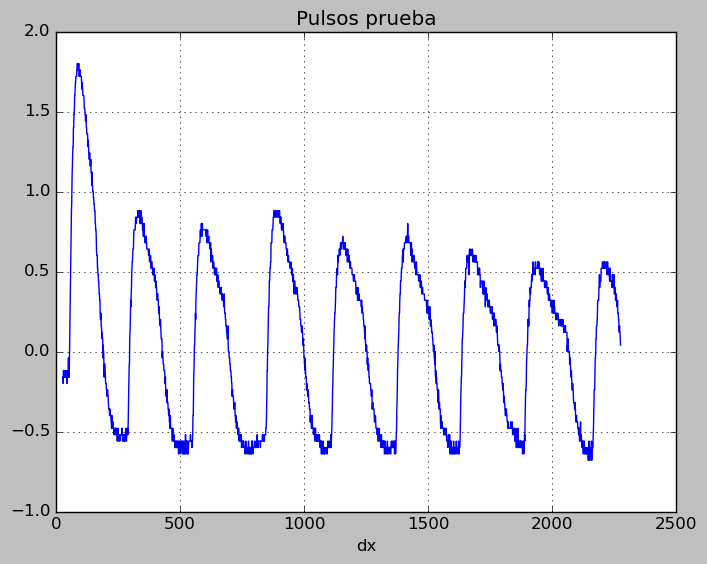

In [27]:
#Graficamos los datos 
figure(dpi=100)
n=np.linspace(0,11,11)
title("Pulsos prueba")
 #Limpiamos la señal, quedándonos únicamente con los pulsos musculares
plot(Datos_exp['Value'][27:2277])
xlabel('dx')
grid(True)
show()

In [22]:
#Transformada de fourier  (o un intento de )

$$
g(k)= \mathbb{F}\{g(n)\} = 
\sum_{n=0}^{N-1}g_{n}[n]e^{-jnk\frac{2\pi}{N}}
$$

Donde $g[n]$ es la función en tiempo discreto, 


In [12]:
gn = [Datos_exp] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk



ValueError: could not convert string to float: 'Record Length'

In [ ]:

M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)



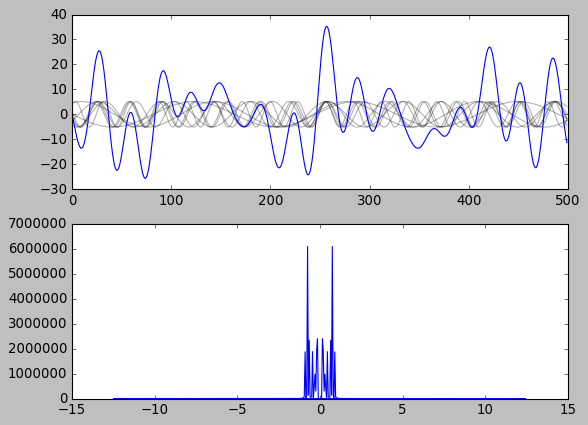

In [7]:

class Wave:
    def __init__(self):
        # Amplitud Desfase Freq. Angular
        self.params = [5.12, np.random.rand(), np.random.rand()]

    def evaluate(self, x):
        return self.params[0] * np.sin(self.params[1] + 2 * np.pi * x * self.params[2])


def main():
    n_waves = 8

    waves = [Wave() for i in range(n_waves)]

    x = np.linspace(-10, 10, 500)
    y = np.zeros_like(x)

    for wave in waves:
        y += wave.evaluate(x)

    # TRANFORMADA RAPIDA DE FOURIER

    f = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), d = x[1] - x[0])

    fig, ax = plt.subplots(2)

    for wave in waves:
        ax[0].plot(wave.evaluate(x), color = 'black', alpha = 0.3)

    ax[0].plot(y, color = 'blue')
    ax[1].plot(freq, abs(f)**2)
    plt.show()


if __name__ == '__main__':
    main()

In [16]:
def show_M(N):
    """
    N: int 
    """

    n = np.arange(N)
    k = n.reshape((N,1))

    M  = k*n
    print("M:", M)  


def get_data(len):
    """
    len: int 
        lenght of data 
    """
    data = np.random.random(len)
    return data 

def get_circular_terms(N):
    """
    N: int 
    """

    terms =  np.exp(-1j *2*np.pi * np.arange(N)/N)

    return terms

def discrete_fourier_transform(data):
    """
    data: np.array 
        1 dimensional array
    """
    #len of data
    N =data.shape[0] 
    
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-1j * 2*np.pi * k * n/N)
   
    return np.dot(M,data)

def fast_fourier_transform(data):
    """
    data: np.array  
        data as 1D array
    return discrete fourier transform of data
    """

    # len of data
    N = data.shape[0]

    # Must be a power of 2
    assert   N % 2 == 0, 'len of data: {} must be a power of 2'.format(N)

    if N<= 2:
        return discrete_fourier_transform(data)

    else:
        data_even = fast_fourier_transform(data[::2])
        data_odd = fast_fourier_transform(data[1::2])
        terms = get_circular_terms(N)

        return np.concatenate(
            [
            data_even + terms[:N//2] * data_odd,
            data_even + terms[N//2:] * data_odd 
            ])
    

N = 4

X = get_data(N)
print("Data: ",X)

dt =  discrete_fourier_transform(X)
fdft = fast_fourier_transform(X)
dtnp = np.fft.fft(X)

print('DFT:',fdft)

print(np.allclose(dt,dtnp),
    np.allclose(fdft,dtnp))

print("")
show_M(N)



Data:  [0.42907016 0.82624853 0.80203321 0.31094592]
DFT: [ 2.36829782+0.00000000e+00j -0.37296305-5.15302610e-01j
  0.09390893-1.39266154e-16j -0.37296305+5.15302610e-01j]
True True

M: [[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]
